# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm, expm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                    num_iter = 300,
                    verbose = False,
                    )
    
    spam_model.train(inputs = inputs_spam,
                 targets = targets_spam,
                 num_iter = num_iter_spam,
                 verbose = False,
                )
    
    model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                verbose = False,
                )
    
    choi = maps_to_choi([kraus_model])
    spectrum = choi_spectrum(choi)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

### Three Layers

In [4]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0013294516762903154


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0033741289131595607 0


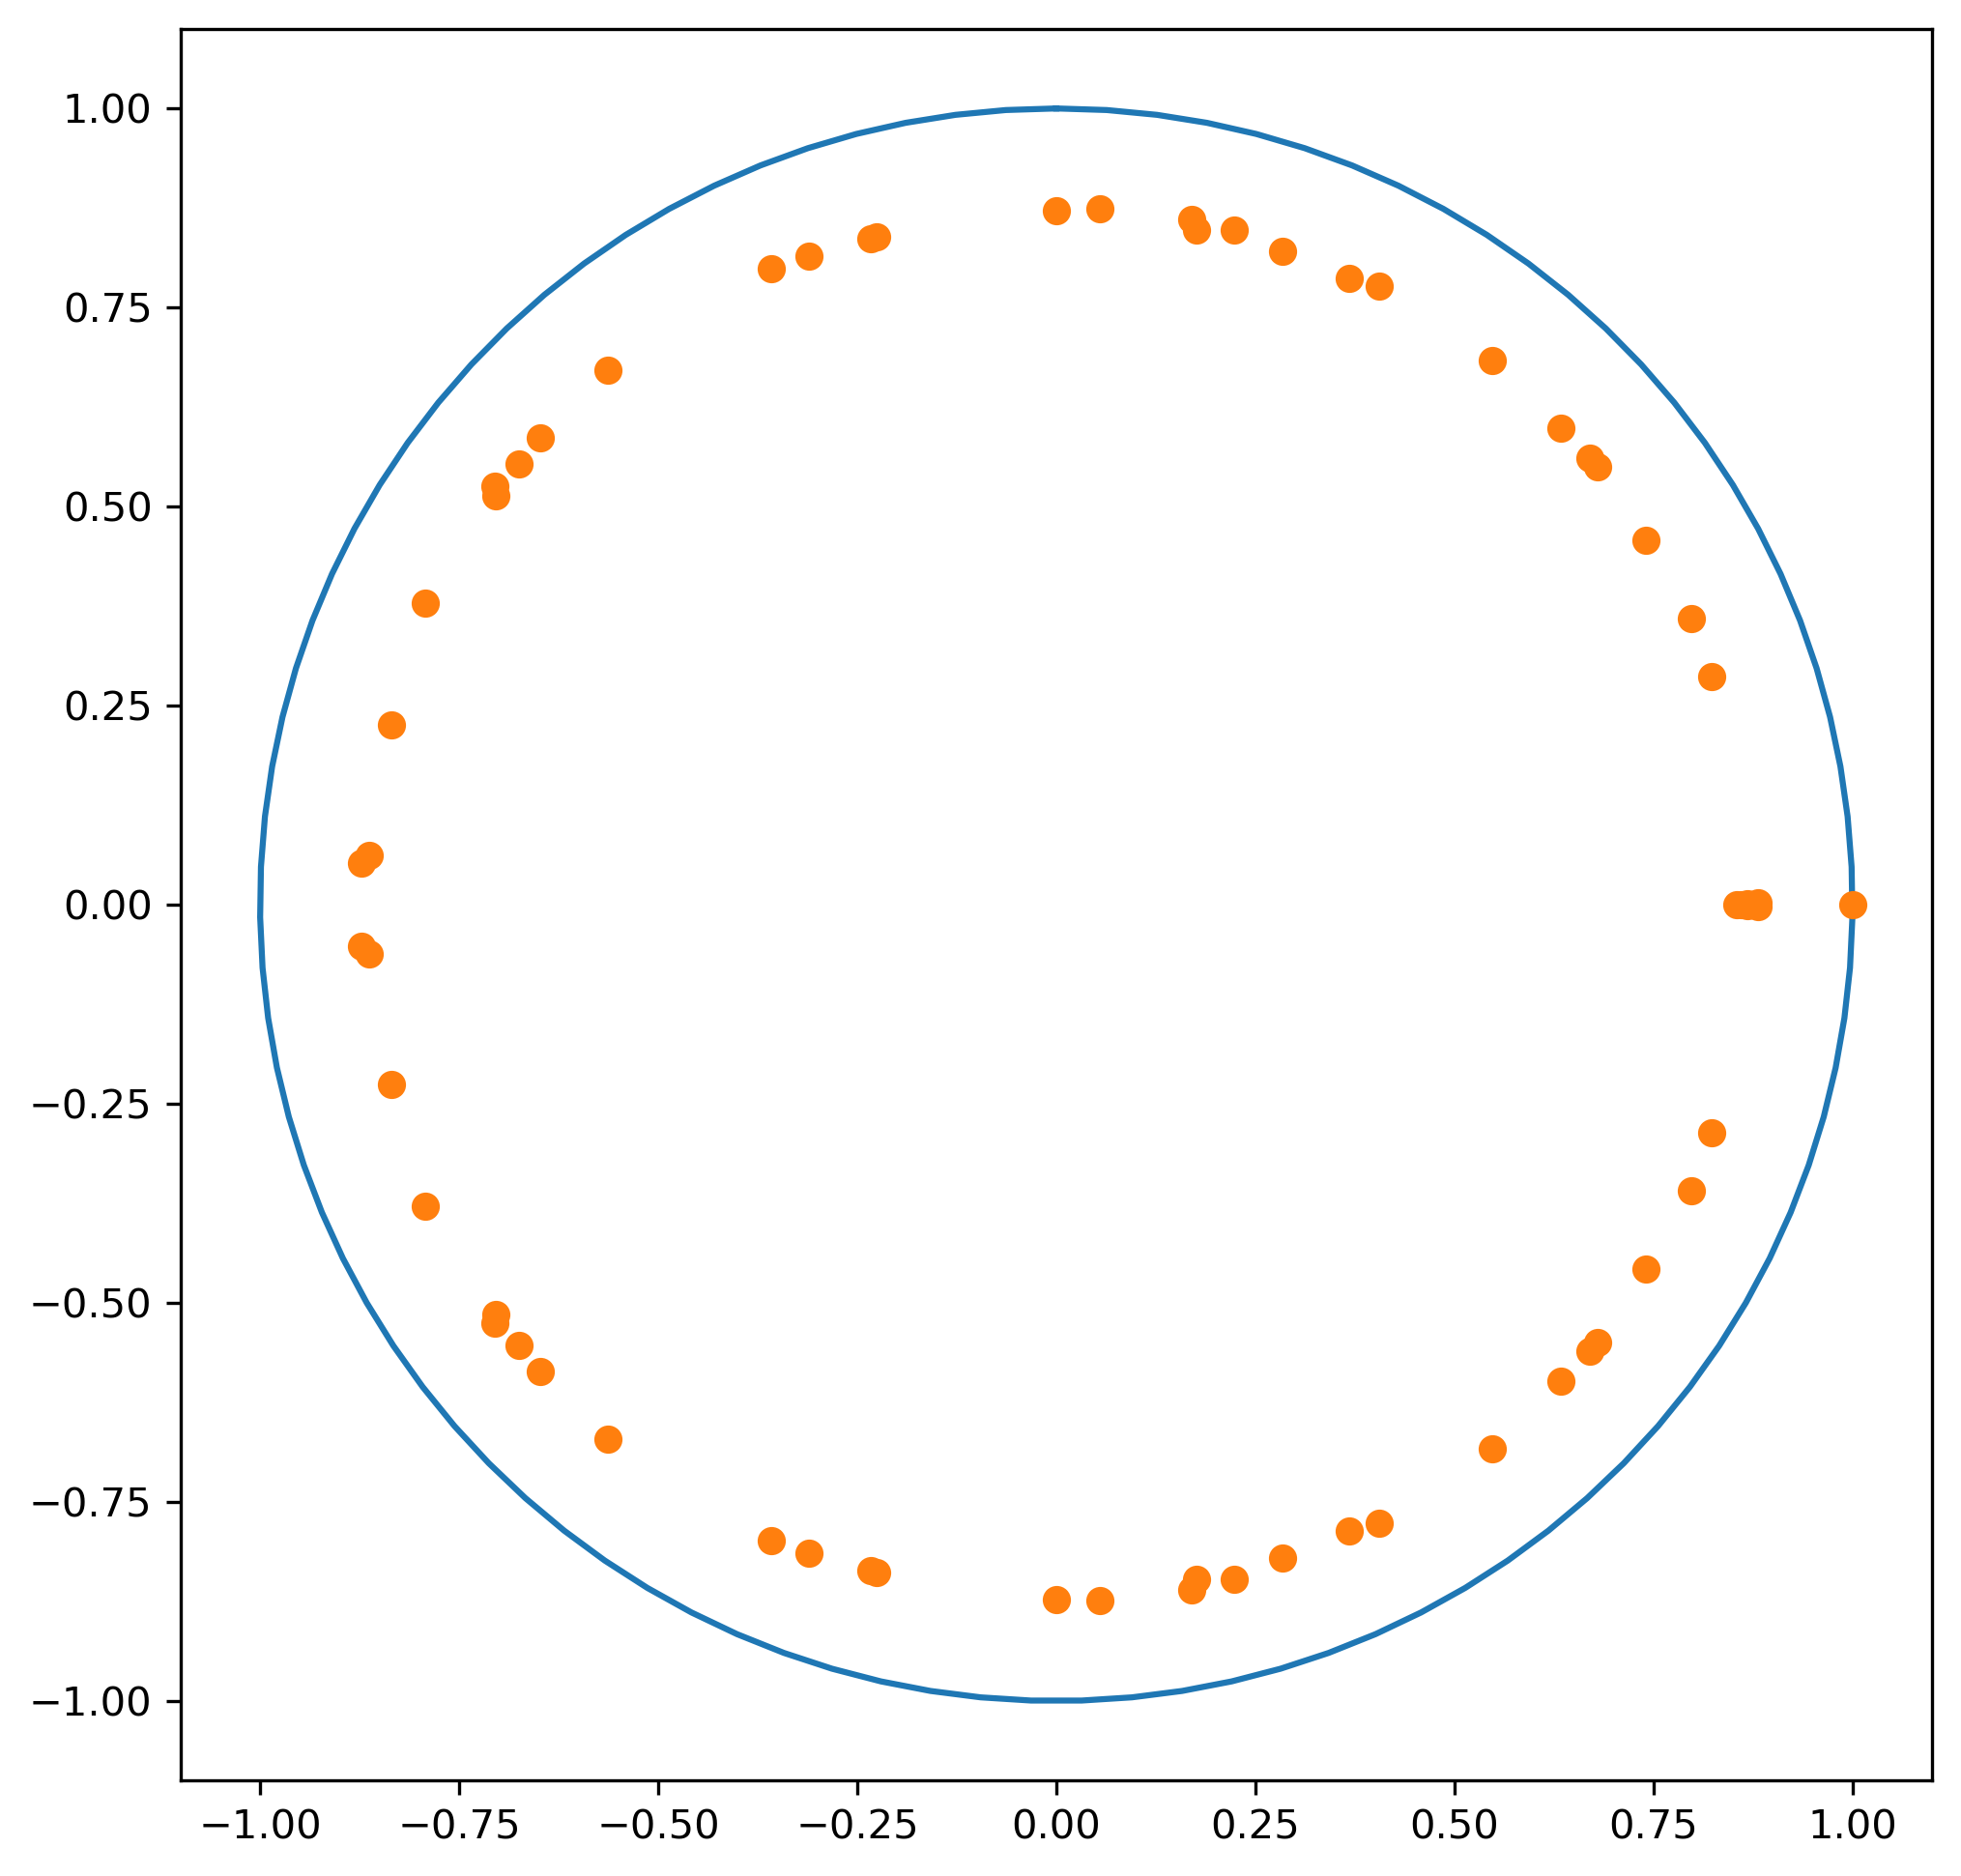

In [5]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

In [6]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_6.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004414185189940032


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0026372260002901523 0


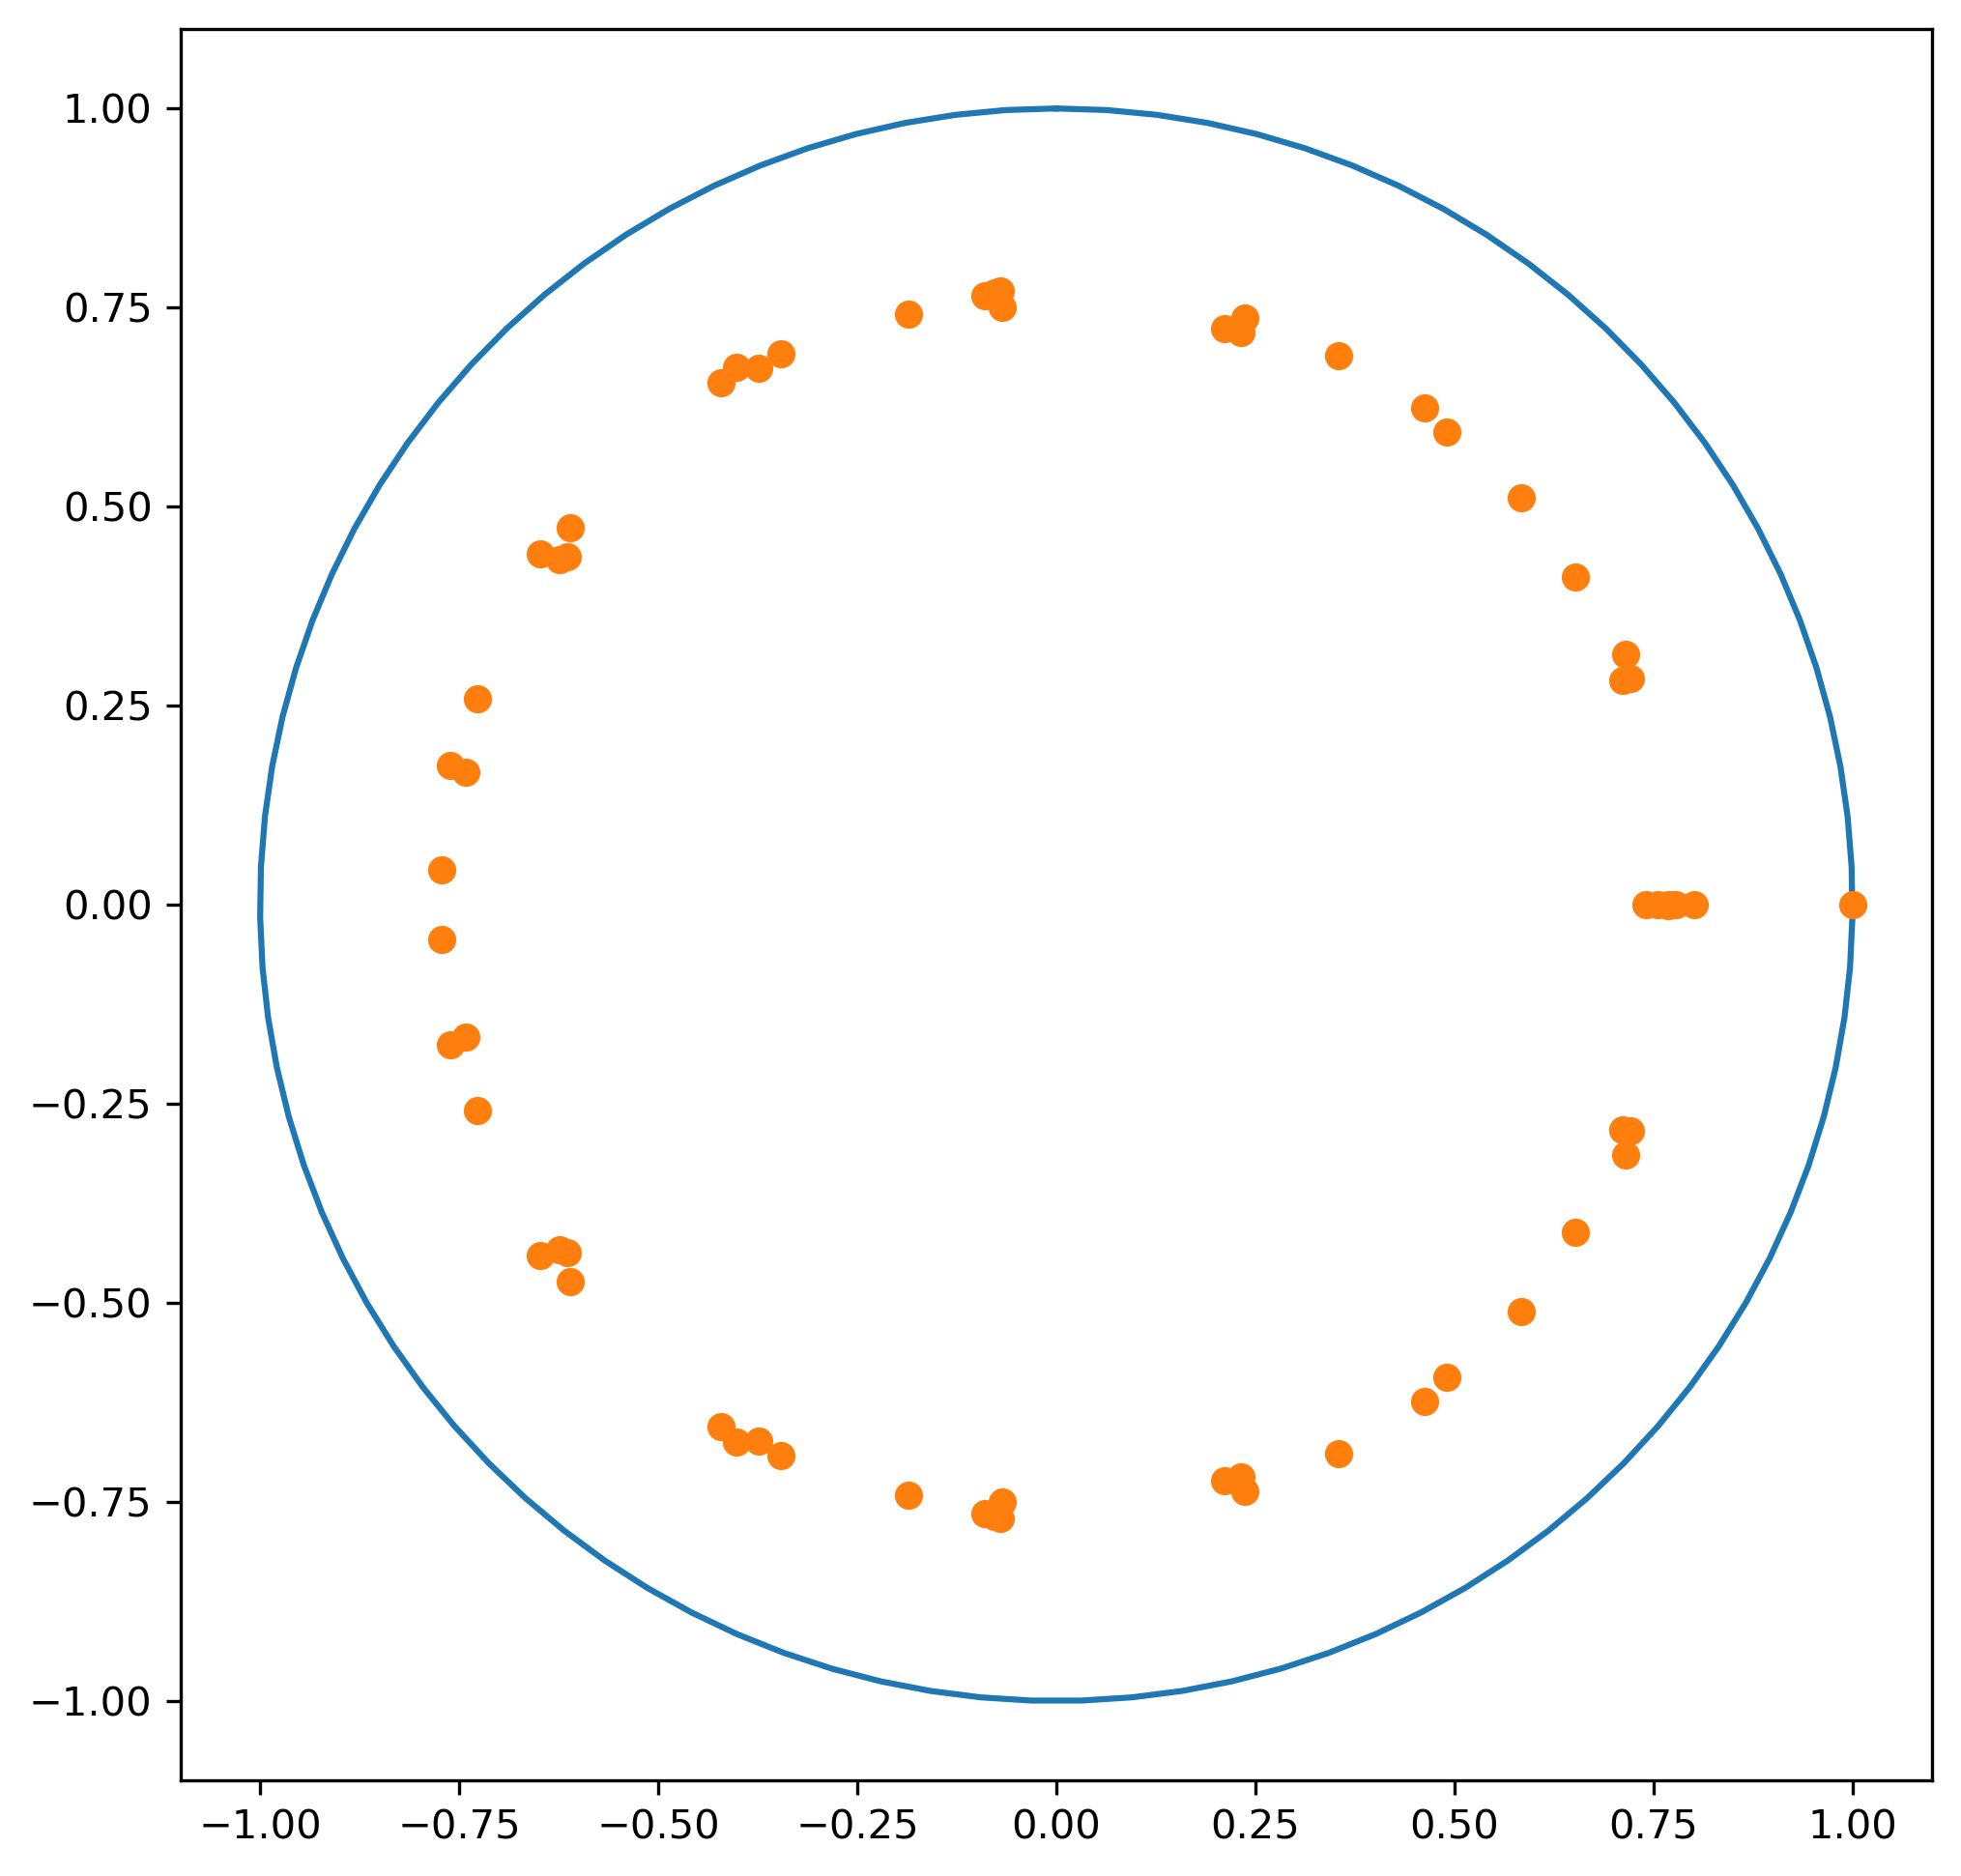

In [7]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

In [8]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004845335577782194


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0035625616283240045 0


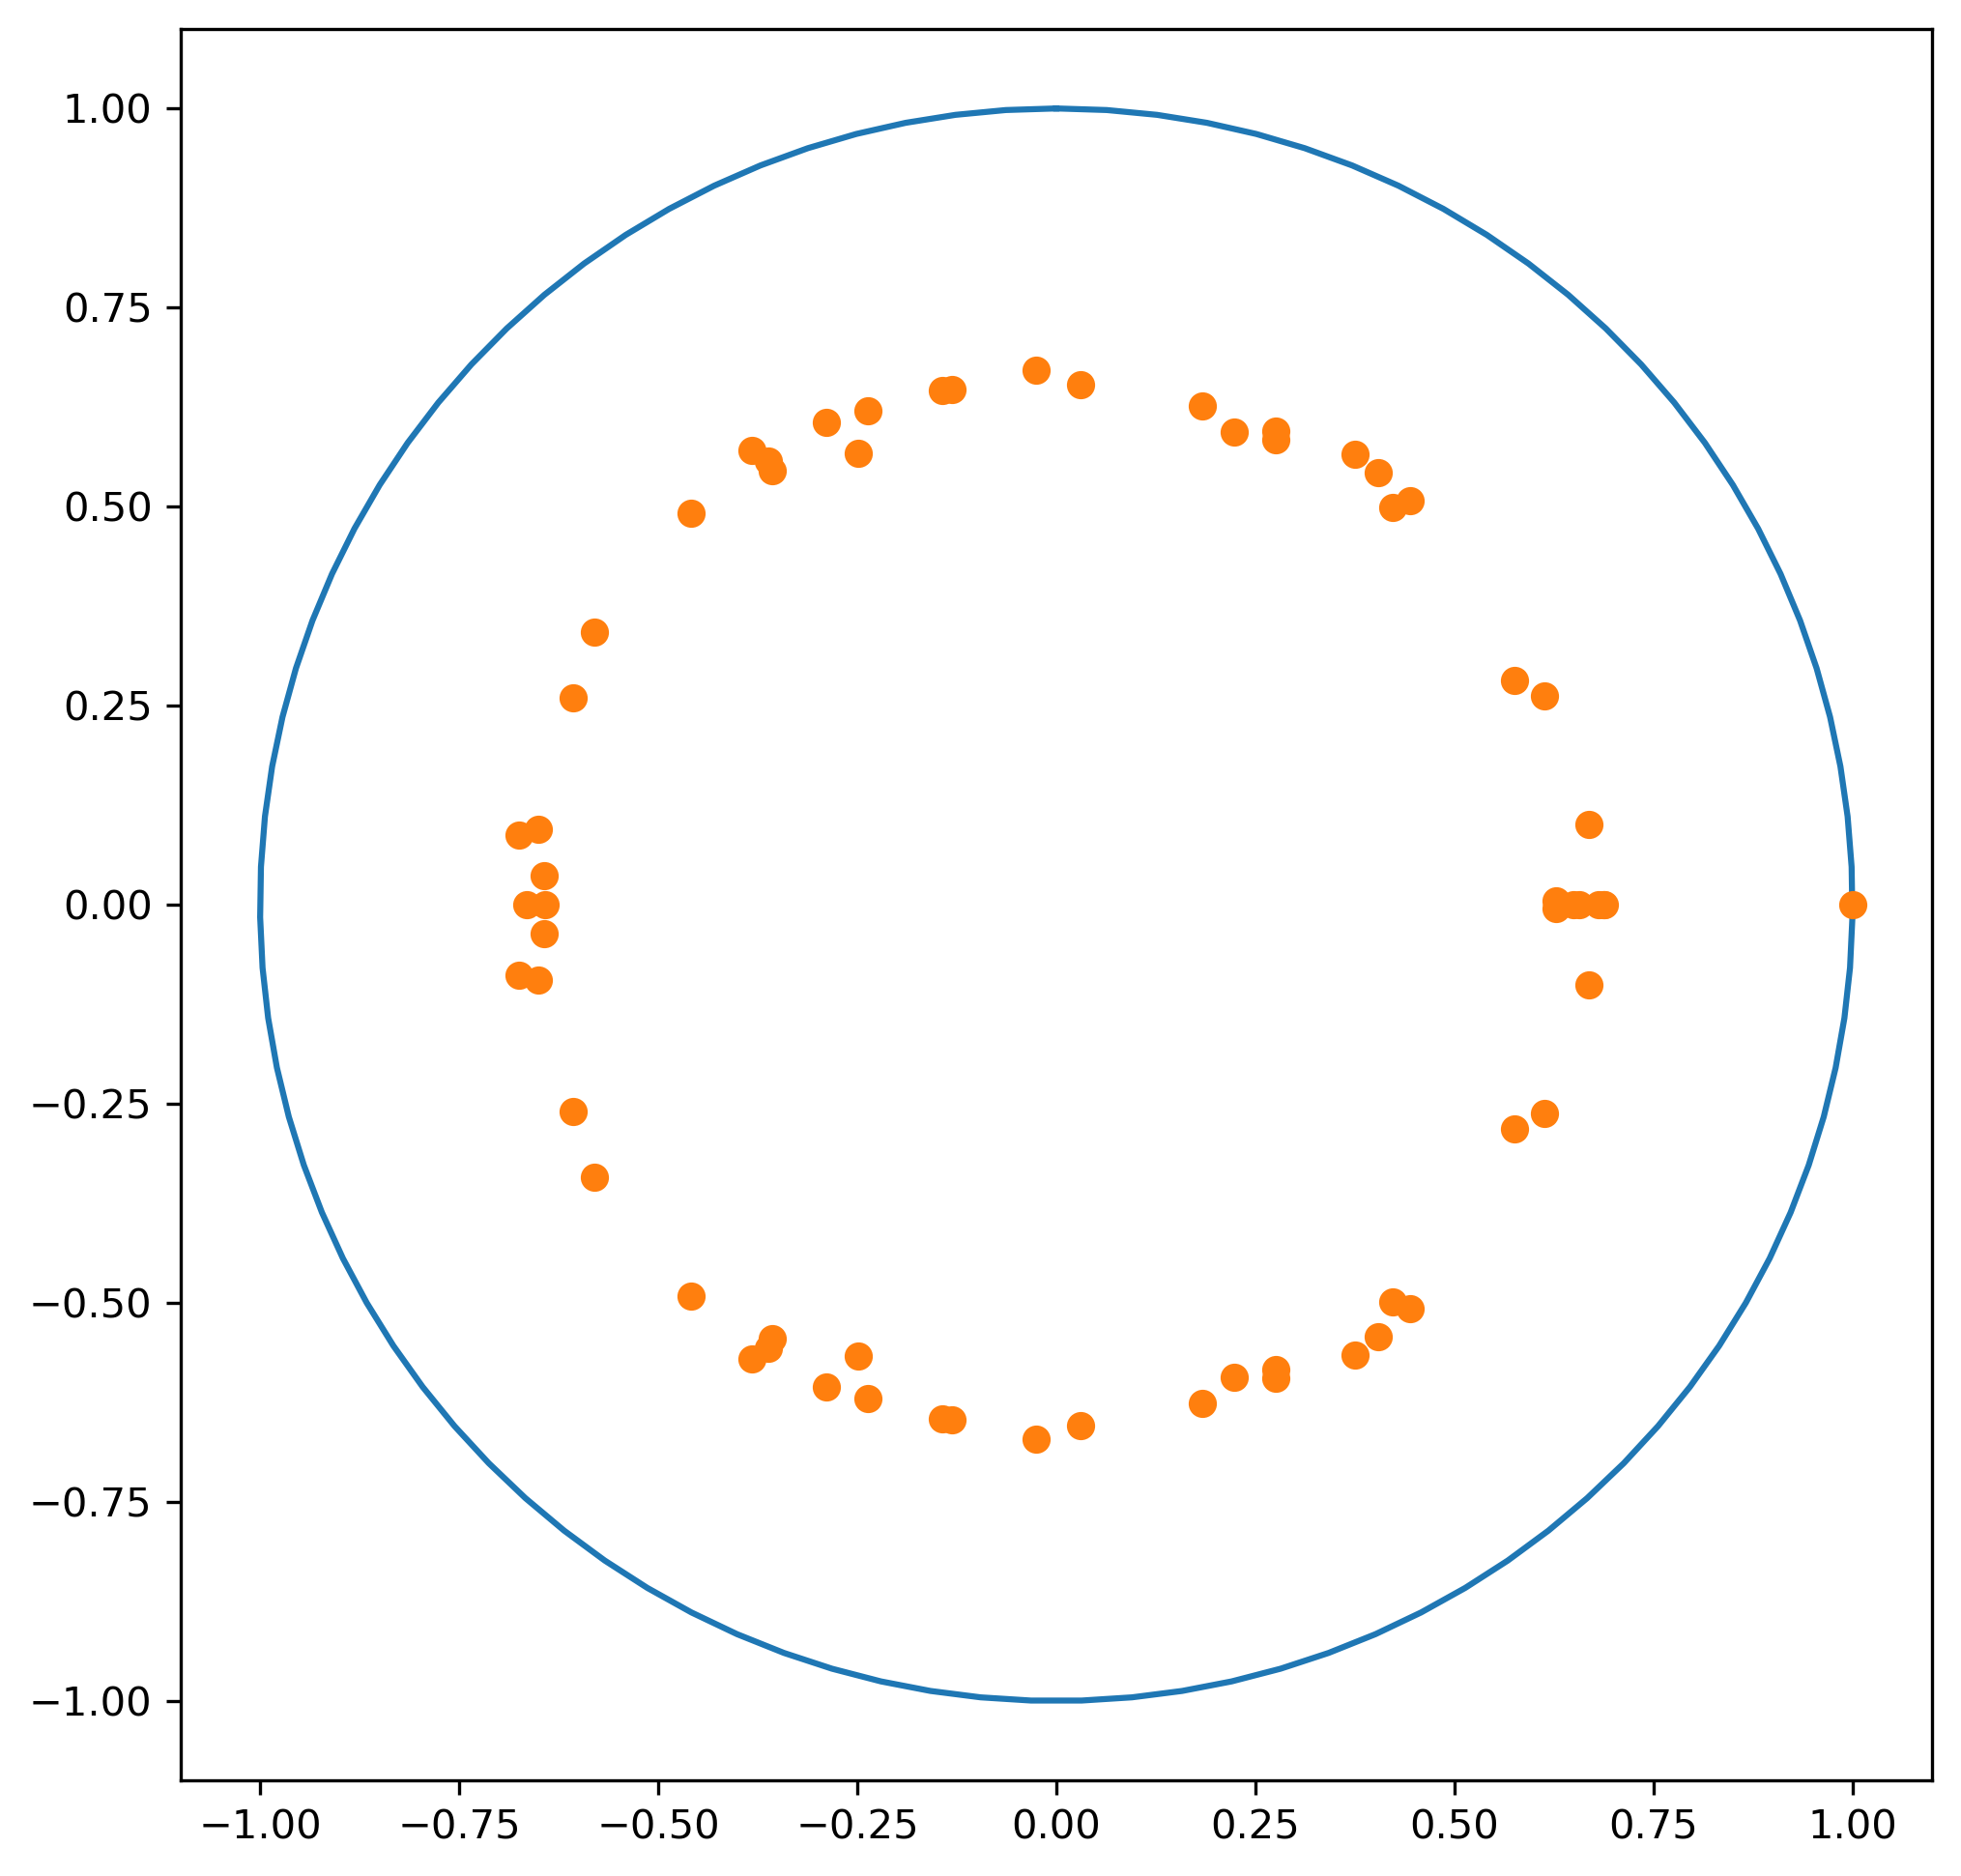

In [9]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()

In [10]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_12.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004070212480028123


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0031585932167906444 0


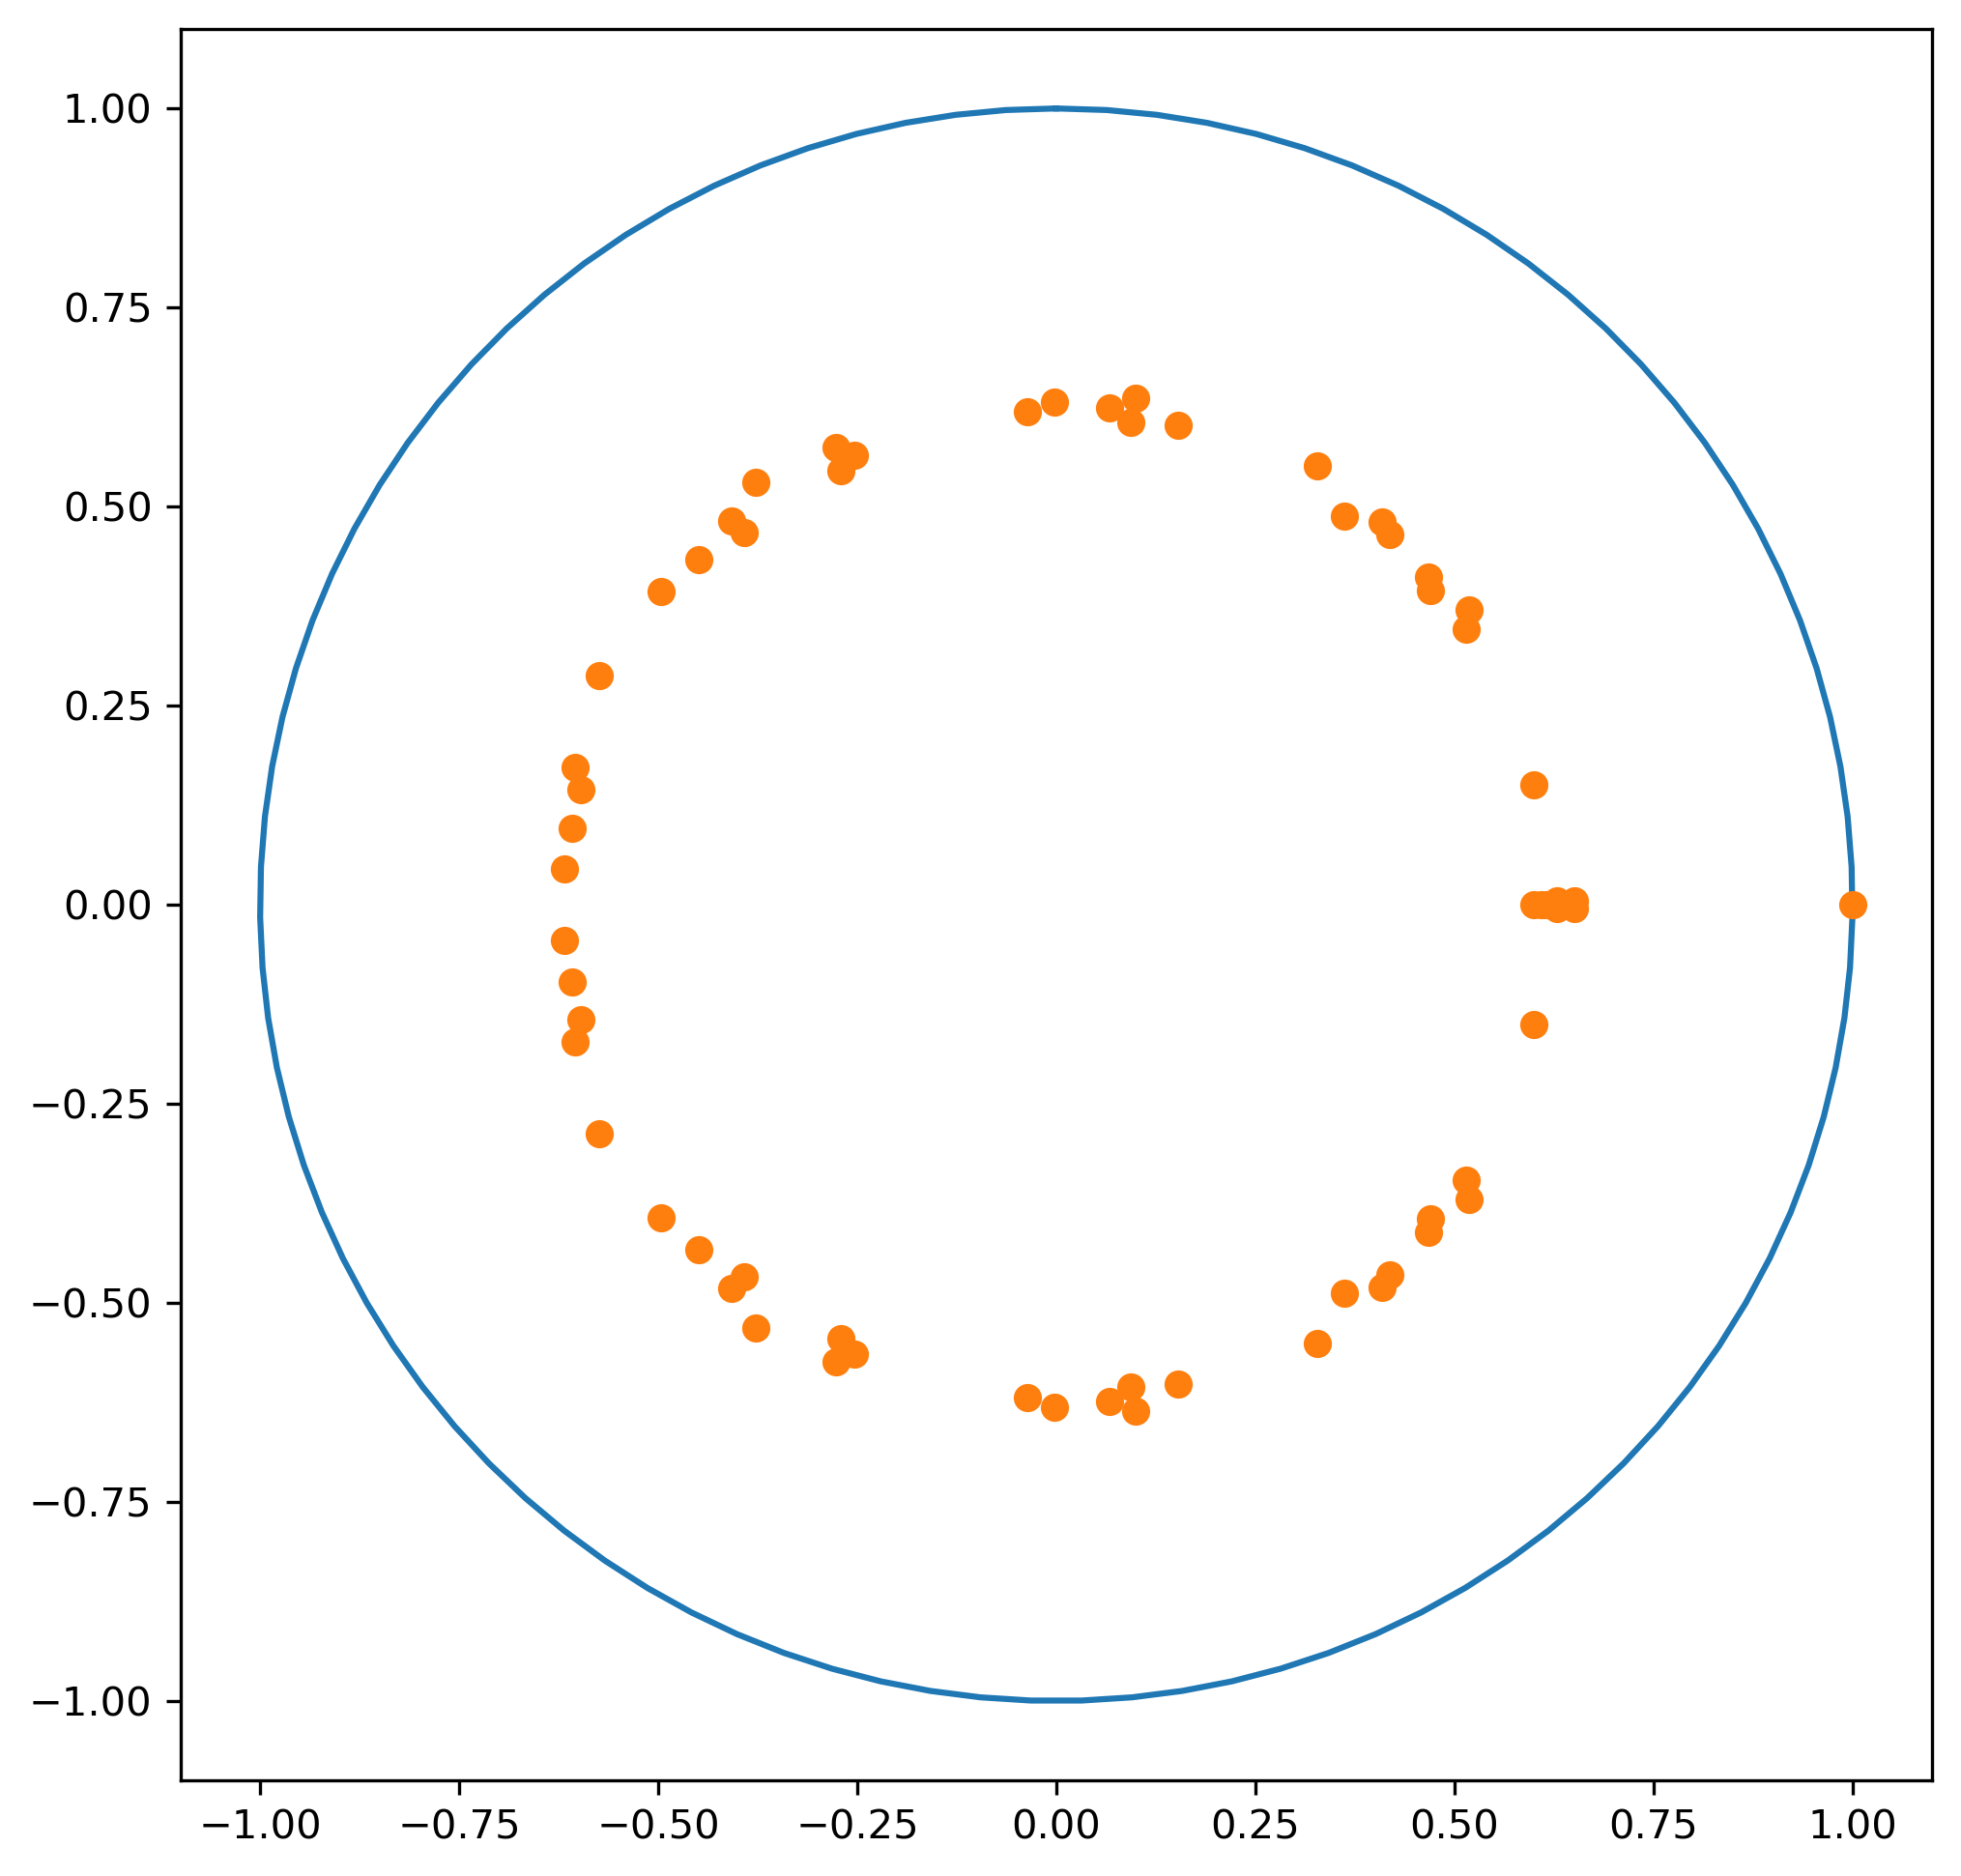

In [11]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(*spectrum, "o")
plt.show()